In [1]:
%matplotlib inline
import numpy as np

import qcodes as qc

from typing import List, Dict, Tuple, Any
import matplotlib.pyplot as plt
from matplotlib import ticker, gridspec
import qcodes as qc
from qcodes import Parameter, new_experiment, Measurement, initialise_database, load_or_create_experiment, load_by_id,initialise_or_create_database_at, load_by_id
from qcodes.dataset.plotting import plot_dataset,plot_by_id

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 150


In [4]:
initialise_or_create_database_at('F:\QCoDeSLocal\SpinQubit\database\IMEC_AL809789_D18_D3SD4_T4.db') 


In [11]:
ds = load_by_id(347)
x=ds.get_parameter_data()['keithley_A_smua_curr']['keithley_A_smua_volt'].flatten()

y=ds.get_parameter_data()['keithley_A_smua_curr']['keithley_A_smua_curr'].flatten()


In [30]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
x_fit = np.linspace(x.min(),x.max(),4)
y_fit = poly1d_fn(x_fit)

total_fridge_resistance = 3.84e3 #Ohm

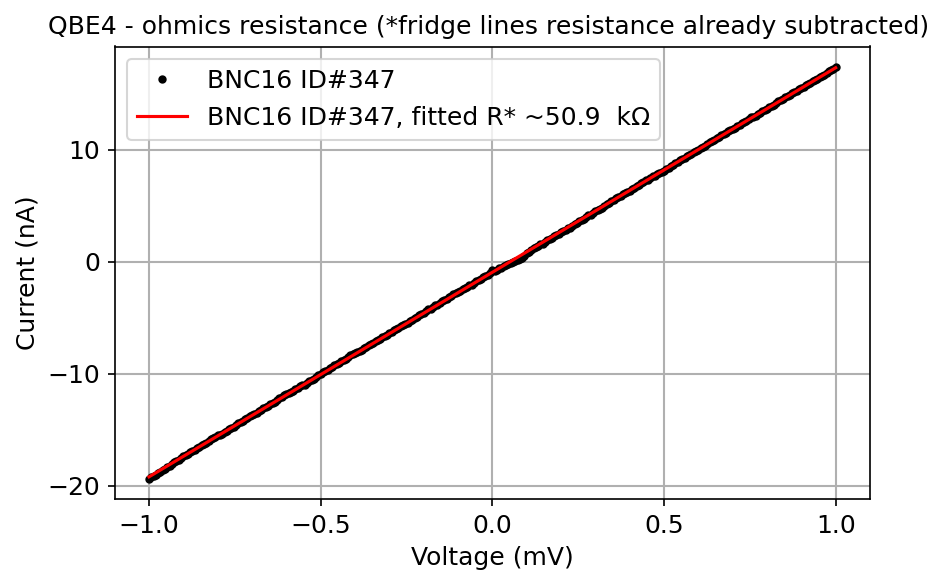

In [34]:
fig, ax = plt.subplots()
ax.plot(x*1e3,y*1e9, '.k', label=f'BNC16 ID#{ds.captured_run_id}')
ax.plot(x_fit*1e3, y_fit*1e9, '-r',label=f'BNC16 ID#{ds.captured_run_id}, fitted R* ~{(1/coef[0]-total_fridge_resistance)/1e3:.1f}  k\u03A9')
#plt.xlim(T_squared_axis[0]*1.1, T_squared_axis[-1]*1.1)
#plt.ylim(vheater_fitted[0]*1.1, vheater_fitted[-1]*1.1)

plt.xlabel('Voltage (mV)', size = 12)
plt.ylabel('Current (nA)',size = 12)
plt.title( f"QBE4 - ohmics resistance (*fridge lines resistance already subtracted) ")
plt.tick_params(labelsize= 12)
plt.tight_layout()
plt.locator_params(axis="y", nbins=5)
plt.locator_params(axis="x", nbins=5)
plt.grid(linewidth=1)
ax.legend(fontsize=12)

plt.savefig(f"{ds.captured_run_id}_fit.png",bbox_inches='tight')            